## 1. Obtain and review raw data
<p>In this Explorartory Data Analysis project we will be using data of user of a popular GPS fitness tracker called <a href="https://runkeeper.com/">Runkeeper</a> for years and analyze their running data to see how they were doing. We will be taking an analytical look at the facts and insights of the data in a step-by-step process.</p>
<p>Since 2012, they've been using the Runkeeper app, and it's great. One key feature: its excellent data export. Anyone who has a smartphone can download the app and analyze their data like we will in this notebook.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/runner_in_blue.jpg" alt="Runner in blue" title="Explore world, explore your data!"></p>
<p>After logging your run, the first step is to export the data from Runkeeper. Then import the data and start exploring to find potential problems. After that, create data cleaning strategies to fix the issues. Finally, analyze and visualize the clean time-series data.</p>
<p>We will be using seven years worth of my training data, from 2012 through 2018. The data is a CSV file where each row is a single training activity. Let's load and inspect it.</p>

In [1]:
import pandas as pd
class color: 
    BOLD = '\033[1m'
    END = '\033[0m'
# Dates Column parsed as datetime and set as index
df_activities = pd.read_csv('cardioActivities.csv', parse_dates = True, index_col = 'Date') 

# Sample 3 observations from the dataframe
print(color.BOLD + 'Random sample of 3 observations:' + color.END)
display(df_activities.sample(n = 3))

print(color.BOLD + 'First 5 observations:' + color.END)
display(df_activities.head(3))
print('\n')
print(color.BOLD + 'Column-wise information of the dataframe: \n' + color.END)
display(df_activities.info())

Random sample of 3 observations:


,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2012-11-24 08:57:47,0cec5506-32bd-423c-b651-b76718eaba89,Running,NaN,2.65,14:07,5:20,11.27,186.0,15,NaN,NaN,NaN,2012-11-24-085747.gpx
2016-11-10 18:31:03,e29a6eb4-cd05-4dab-ac97-39ee3ecf0555,Running,NaN,6.83,40:03,5:52,10.22,484.0,67,134.0,NaN,TomTom MySports Watch,2016-11-10-183103.gpx
2012-08-28 19:43:52,159e2b06-5808-4204-9d86-013132be67af,Walking,NaN,1.46,13:24,9:12,6.52,87.0,13,NaN,NaN,NaN,2012-08-28-194352.gpx


First 5 observations:


,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx




Column-wise information of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-nul

None

## 2. Data preprocessing
<p>Lucky for us, the column names Runkeeper provides are informative, and we don't need to rename any columns.</p>
<p>But, we do notice missing values using the <code>info()</code> method. What are the reasons for these missing values? It depends. Some heart rate information is missing because they didn't always use a cardio sensor. In the case of the <code>Notes</code> column, it is an optional field that they sometimes left blank. Also, they only used the <code>Route Name</code> column once, and never used the <code>Friend's Tagged</code> column.</p>
<p>We'll fill in missing values in the heart rate column to avoid misleading results later, but right now, our first data preprocessing steps will be to:</p>
<ul>
<li>Remove columns not useful for our analysis.</li>
<li>Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.</li>
<li>Count missing values.</li>
</ul>

In [2]:
cols_to_drop = ["Friend\'s Tagged","Route Name","GPX File","Activity Id","Calories Burned", "Notes"]
df_activities.drop(cols_to_drop, inplace = True, axis = 1)

df_activities['Type'] = df_activities['Type'].str.replace('Other','Unicycling')

Counts of each activity type:


,Type
Running,459
Cycling,29
Walking,18
Unicycling,2


Column-wise information and visualization of the missing data:


Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

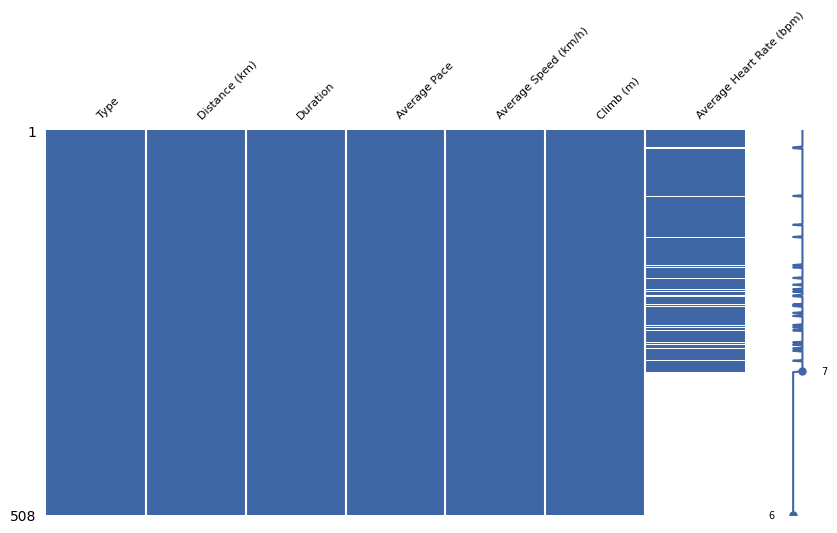

In [3]:
import missingno as msno
import matplotlib.pyplot as plt
print(color.BOLD + 'Counts of each activity type:' + color.END)
display(pd.DataFrame(df_activities['Type'].value_counts()))

# Count missing values for each column
msno.matrix(df_activities,color=(0.25, 0.4, 0.65),figsize = (10,5),fontsize = 8)
print(color.BOLD + 'Column-wise information and visualization of the missing data:' + color.END)
display(df_activities.isnull().sum())

To check for the randomness in the missing data we can first check by sorting the dataset and see if the randomness is due to date of recording average heart rate or if it is completely at random. Since the data is already sorted, we can clearly see that majority of the missing data is from the start of the collection of the data. This suggests that the user must not have turned on the settings that registered the heart rate. We can also check to see if there's a pattern in the missing data based on the Average Speed.


<AxesSubplot:>

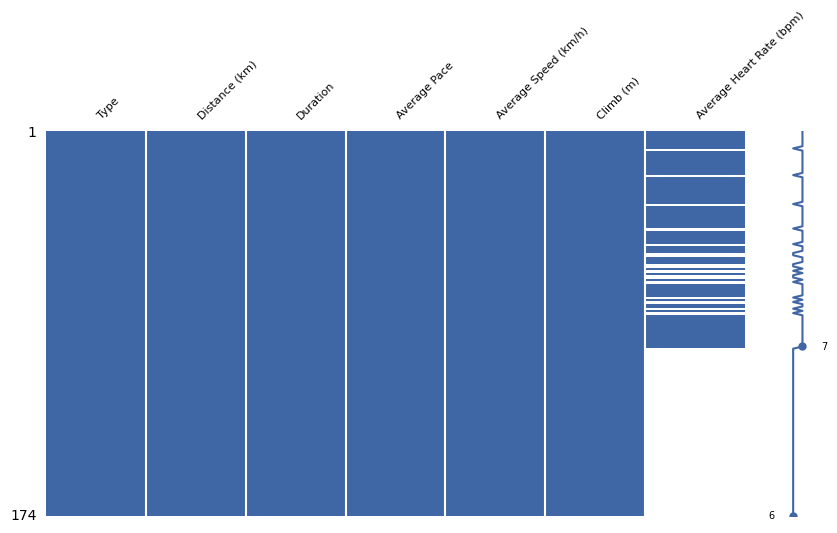

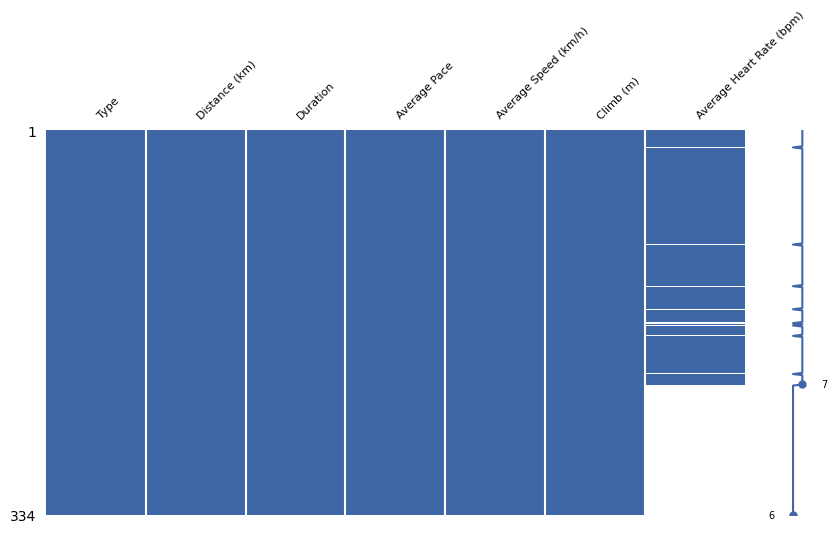

In [4]:
df_abovemean = df_activities[df_activities['Average Speed (km/h)'] >= df_activities['Average Speed (km/h)'].mean()]
df_belowmean = df_activities[df_activities['Average Speed (km/h)'] < df_activities['Average Speed (km/h)'].mean()]

msno.matrix(df_abovemean,color=(0.25, 0.4, 0.65),figsize = (10,5),fontsize = 8)
msno.matrix(df_belowmean,color=(0.25, 0.4, 0.65),figsize = (10,5),fontsize = 8)

It looks like there were more missing data points where the Average Speed for higher than the mean Average Speed.

## 3. Dealing with missing values
<p>As we can see from the last output, there are 214 missing entries for my average heart rate.</p>
<p>We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called <em>mean imputation</em>. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (<code>Type</code>) and calculate each activity's mean heart rate, then fill in the missing values with those means.</p>

In [5]:
types = df_activities.groupby('Type')
df_run =types.get_group('Running')
df_walk = types.get_group('Walking')
df_cycle = types.get_group('Cycling')
df_unicycle = types.get_group('Running')

In [6]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
avg_hr_walk = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_unicycle = df_activities[df_activities['Type'] == 'Unicycling']['Average Heart Rate (bpm)'].mean()

# Groups
types = df_activities.groupby('Type')
df_run =types.get_group('Running').copy()
df_walk = types.get_group('Walking').copy()
df_cycle = types.get_group('Cycling').copy()
df_unicycle = types.get_group('Unicycling').copy()

subgroups = [df_run,df_walk,df_cycle,df_unicycle]

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(int(avg_hr_walk), inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
df_unicycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_unicycle), inplace=True)

# Count missing values for each column in running data
for i in subgroups:
    display(i.isna().sum())

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

## 4. Plot running data
<p>Now we can create our first plot! As we found earlier, most of the activities in my data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics.</p>
<p>An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, <code>Date</code>, is shared among all subplots.</p>

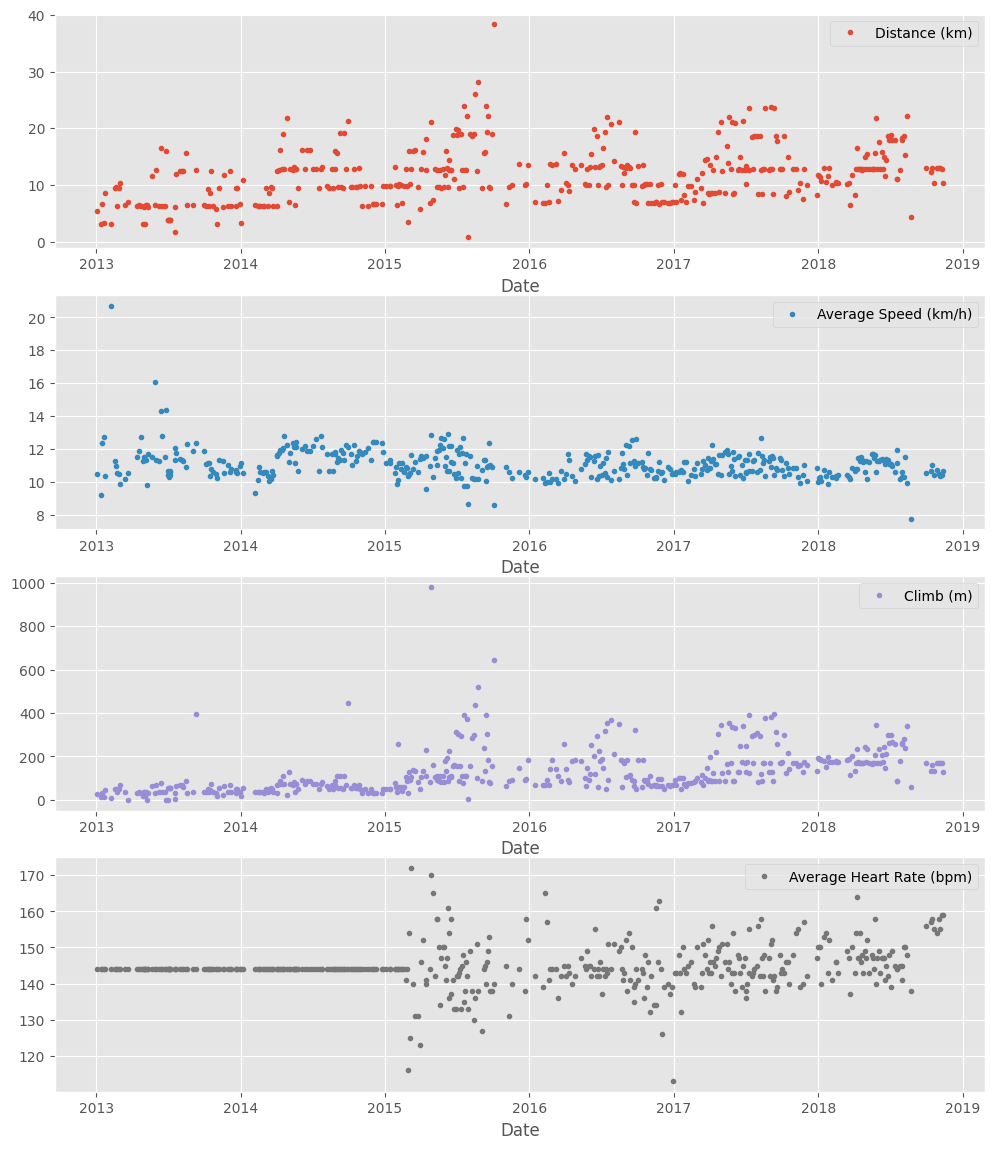

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run['2013':'2018']

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,14),
                           linestyle='none',
                           marker='o',
                           markersize=3
                          )
plt.show()

## 5. Running statistics
<p>No doubt, running helps people stay mentally and physically healthy and productive at any age. And it is great fun! When runners talk to each other about their hobby, we not only discuss our results, but we also discuss different training strategies. </p>
<p>You'll know you're with a group of runners if you commonly hear questions like:</p>
<ul>
<li>What is your average distance?</li>
<li>How fast do you run?</li>
<li>Do you measure your heart rate?</li>
<li>How often do you train?</li>
</ul>
<p>Let's find the answers to these questions in my data. If you look back at plots created in the previous task, you can see the answer to, <em>Do you measure your heart rate?</em> Before 2015: no. To look at the averages, let's only use the data from 2015 through 2018.</p>
<p>In pandas, the <code>resample()</code> method is similar to the <code>groupby()</code> method - with <code>resample()</code> you group by a specific time span. We'll use <code>resample()</code> to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.</p>

In [8]:
# Prepare running data for the last 4 years
runs_subset_2013_2018 = df_run['2015':'2018']

# Calculate annual statistics
print(color.BOLD +'How my average run looks in last 6 years:'+ color.END)
display(round(runs_subset_2013_2018.resample('A').mean(),2))

# Calculate weekly statistics
print(color.BOLD + 'Weekly averages of last 6 years:' + color.END)
display(round(runs_subset_2013_2018.resample('W').mean().mean(),2))

# Mean weekly counts
weekly_counts_average = runs_subset_2013_2018['Distance (km)'].resample('W').count().mean()
print(color.BOLD + "How many trainings per week I had on average:"+ color.END, round(weekly_counts_average, 2))



How my average run looks in last 6 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.60,11.00,160.17,143.35
2016-12-31,11.41,10.84,133.19,143.39
2017-12-31,12.94,10.96,169.38,145.25
2018-12-31,13.34,10.78,191.22,148.12


Weekly averages of last 6 years:


Distance (km)                12.52
Average Speed (km/h)         10.84
Climb (m)                   158.33
Average Heart Rate (bpm)    144.80
dtype: float64

How many trainings per week I had on average: 1.5


### Visualizing progress over years of using Runkeeper
It looks like there has has been an overall increase in the average climb and distance covered since the start of using Runkeeper.

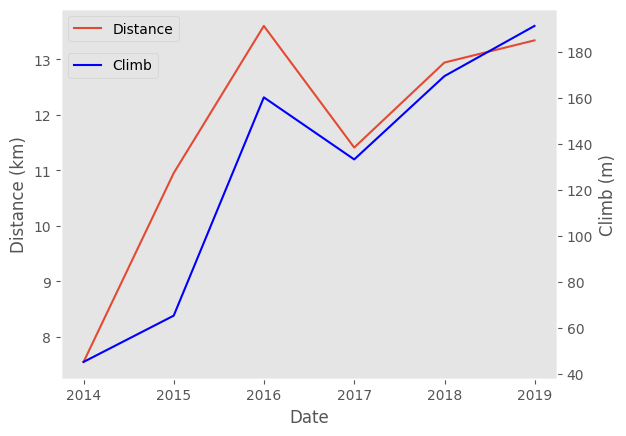

In [9]:
import seaborn as sns
runs_subset_2013_2018 = df_run['2013':'2018']
annual_stats_df = round(runs_subset_2013_2018.resample('A').mean(),2)
sns.set_style({'axes.grid' : False})
sns.lineplot(data = annual_stats_df, x = annual_stats_df.index, y ='Distance (km)', label = 'Distance')
ax2 = plt.twinx()
sns.lineplot(data = annual_stats_df, x = annual_stats_df.index, y ='Climb (m)', ax = ax2,  color = "b",label = 'Climb')
plt.legend(bbox_to_anchor=(0, .9), loc=2)
plt.show()

## 6. Visualization with averages
<p>Let's plot the long term averages of my distance run and my heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018.</p>
<p>In this task, we will use <code>matplotlib</code> functionality for plot creation and customization.</p>

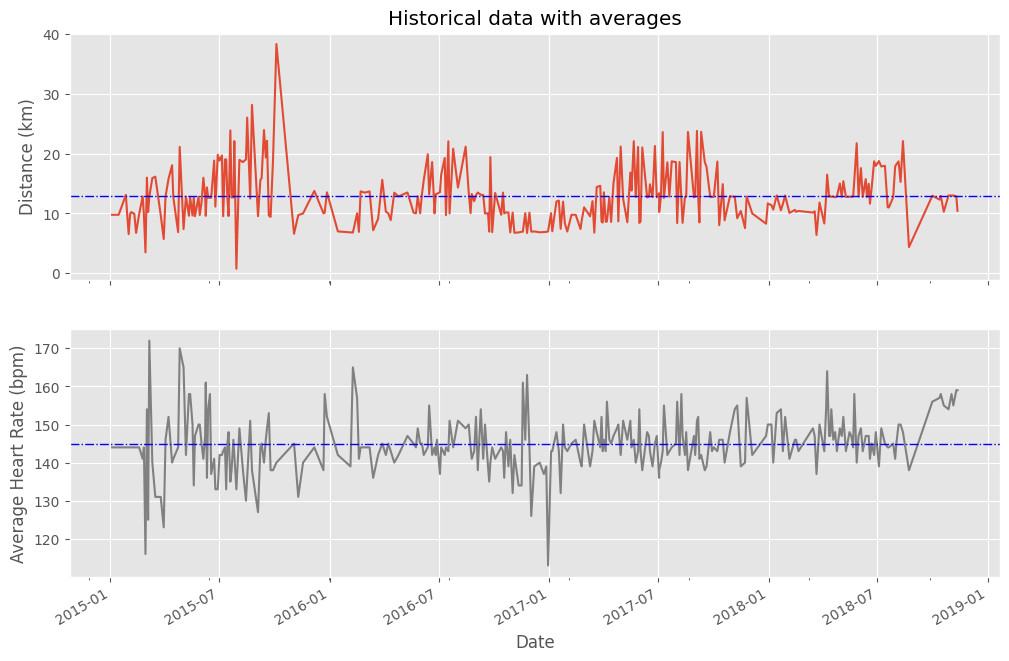

In [10]:
runs_subset_2015_2018 = df_run['2015':'2018']
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create plot
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2,sharex = True, figsize = (12,8))

# Plot and customize first subplot
runs_distance.plot(ax = ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')
plt.show()

## 7. Did they reach their goals?
<p>Let's assume that the user, set a target goal of running 1000 km per year. Let's visualize my annual running distance (km) from 2013 through 2018 to see if they reached my goal each year. Only stars in the green region indicate success.</p>

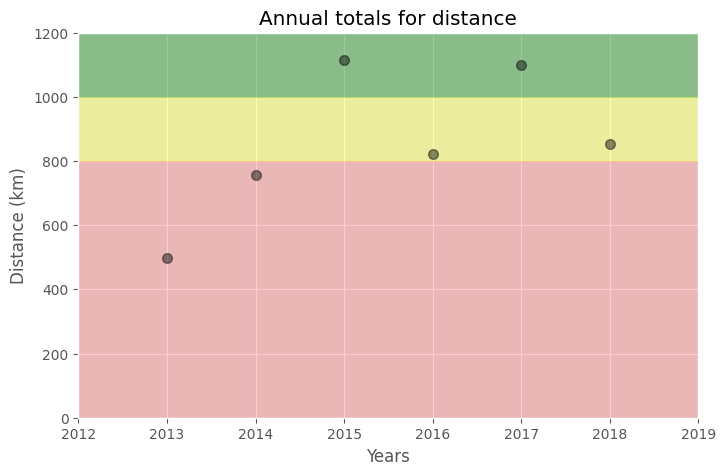

In [11]:
# Prepare data
df_run_dist_annual = df_run['2013':'2018']['Distance (km)'].resample('A').sum()

# Create plot
fig = plt.figure(figsize = (8,5))

# Plot and customize
ax = df_run_dist_annual.plot(marker='.', markersize=14, linewidth=0, color='black', alpha = 0.45)
ax.set(ylim=[0, 1200], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)
plt.show()

## 8. Are they progressing?
<p>Let's dive a little deeper into the data to answer a tricky question: are they progressing in terms of my running skills? </p>
<p>To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.</p>
<p>We are going to use <code>statsmodels</code> library to decompose the weekly trend.</p>

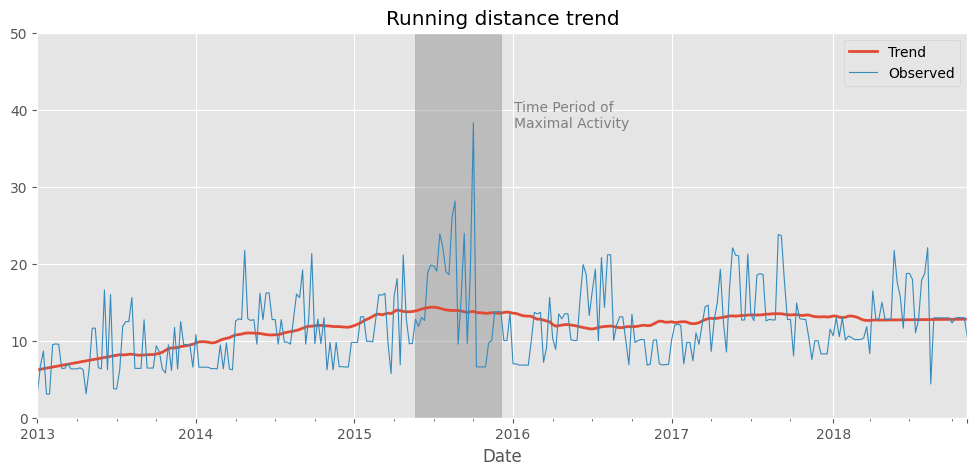

In [12]:
# Import required library
import statsmodels.api as sm

# Prepare data
df_run_dist_wkly = df_run['2013':'2018']['Distance (km)'].resample('W').bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1)

fig,ax = plt.subplots(figsize = (12,5))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.8)
ax.axvspan('2015-05-21','2015-12-01', color = 'grey', alpha = 0.4)
ax.annotate('Time Period of \nMaximal Activity',
            xy=(370, 250), xycoords='figure points', color = 'gray')
ax.set(ylim = [0,50])
ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

## 9. Training intensity
<p>Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.</p>
<p>We'll create a distribution plot of their heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones. </p>

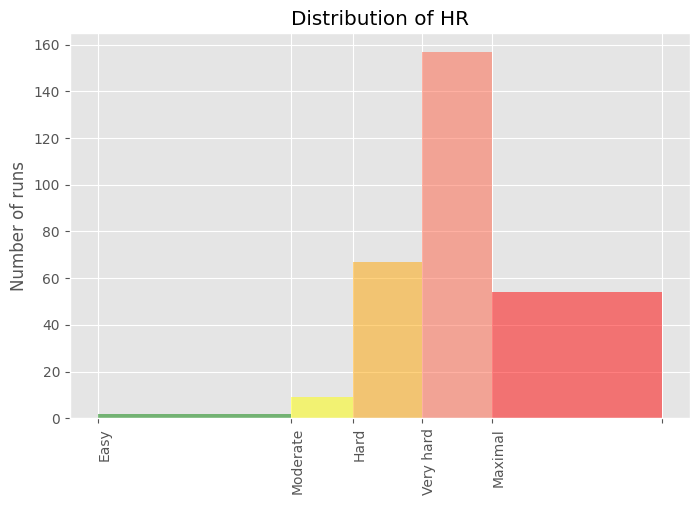

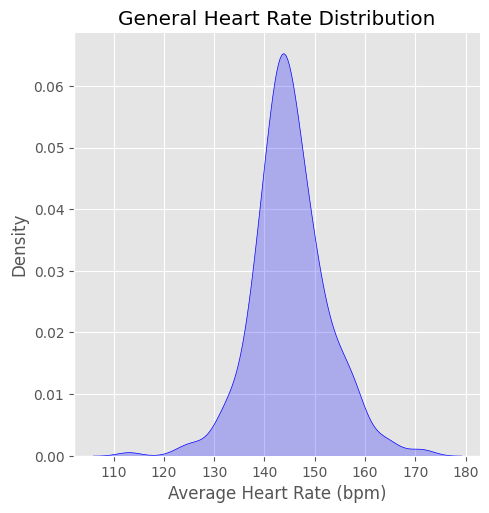

In [13]:
# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal',' ']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run['2015-03-01':'2018']['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize = (8,5))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)

for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])
    
sns.displot(df_run_hr_all,kind = 'kde', fill = True, color = 'blue').set(title= 'General Heart Rate Distribution')
ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels = zone_names, ha = 'left', rotation = 90)

# Show plot
plt.show()

## 10. Detailed summary report
<p>With all this data cleaning, analysis, and visualization, let's create detailed summary tables of their training. </p>
<p>To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.</p>

In [14]:
# Concatenating three DataFrames
df_run_walk_cycle = df_run.append([df_walk,df_cycle]).sort_index(ascending = False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print(color.BOLD + 'Totals for different training types:'+ color.END)
display(df_totals)

# Calculating summary statistics for each type of activities 
df_summary = round(df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe(),2)

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print(color.BOLD+ 'Summary statistics for different training types:' + color.END)
df_summary.stack()

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)  Climb (m)  Distance (km)
Type                                                         
Cycling 25%                   16.98     139.00          15.53
        50%                   19.50     199.00          20.30
        75%                   21.49     318.00          29.40
        count                 29.00      29.00          29.00
        max                   24.33     553.00          49.18
        mean                  19.13     240.55          23.47
        min                   11.38      58.00          11.41
        std                    3.26     128.96           9.45
        total                   NaN    6976.00         680.58
Running 25%                   10.50      54.00           7.42
        50%                   10.98      91.00          10.81
        75%                   11.52     171.00          13.19
        count                459.00     459.00         459.00
        max                   20.72     982.00          38.32
        mean                  11.06     124.79          11.38
        min                    5.77       0.00           0.76
        std                    0.95     103.38           4.94
        total                   NaN   57278.00        5224.50
Walking 25%                    5.56       7.00           1.38
        50%                    5.97      10.00           1.48
        75%                    6.51      15.50           1.79
        count                 18.00      18.00          18.00
        max                    6.91     112.00           4.29
        mean                   5.55      19.39           1.86
        min                    1.04       5.00           1.22
        std                    1.46      27.11           0.88
        total                   NaN     349.00          33.45

## 11. Fun facts
<p>To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.</p>
<p>These data (my running history) represent 6 years, 2 months and 21 days. Let's assume the number of running shoes they went through–7.</p>
<pre><code>FUN FACTS
- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
</code></pre>
<p>The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days). In the picture you can see Forrest’s route of 24,700 km.  </p>
<pre><code>FORREST RUN FACTS
- Average distance: 21.13 km
- Total number of km run: 24,700 km
- Total runs: 1169
- Number of running shoes gone through: ...
</code></pre>
<p>Assuming Forest and they go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/Forrest_Gump_running_route.png" alt="Forrest's route" title="Little run of Forrest Gump"></p>

In [15]:
# Kms per shoe
average_shoes_lifetime = 5224/7

# Count number of shoes for Forrest's run distance
shoes_for_forrest_run = round(24700/average_shoes_lifetime)

print(color.BOLD + 'Forrest Gump would need {} pairs of shoes!'.format(shoes_for_forrest_run) + color.END)

Forrest Gump would need 33 pairs of shoes!
